In [1]:
library(repr)
library(ggplot2)

library("phangorn")
library("treeio")
library("ggtree")
library("ggnewscale")

raxml_file <- "./plusHTD_raxml/RAxML_bipartitionsBranchLabels.KpST16_136VNstrains"
tree <- read.raxml(raxml_file)
as.phylo(tree)

Loading required package: ape

treeio v1.18.1  For help: https://yulab-smu.top/treedata-book/

If you use treeio in published research, please cite:

LG Wang, TTY Lam, S Xu, Z Dai, L Zhou, T Feng, P Guo, CW Dunn, BR Jones, T Bradley, H Zhu, Y Guan, Y Jiang, G Yu. treeio: an R package for phylogenetic tree input and output with richly annotated and associated data. Molecular Biology and Evolution 2020, 37(2):599-603. doi: 10.1093/molbev/msz240



Attaching package: ‘treeio’


The following object is masked from ‘package:ape’:

    drop.tip


Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun

ggtree v3.2.1  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

1. Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpbi.96
2. Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods


Phylogenetic tree with 137 tips and 135 internal nodes.

Tip labels:
  ERR3642314, ERR3642309, ERR3642062, ERR3595903, ERR3567288, ERR3585269, ...

Unrooted; includes branch lengths.

In [2]:
rooted_tree <- treeio::root(tree, outgroup = "Reference", edgelabel = TRUE)
str(rooted_tree)

Formal class 'treedata' [package "tidytree"] with 11 slots
  ..@ file       : chr "./plusHTD_raxml/RAxML_bipartitionsBranchLabels.KpST16_136VNstrains"
  ..@ treetext   : chr "(((ERR3642314:0.00000100000050002909,ERR3642309:0.00000100000050002909):0.00000100000050002909[19],ERR3642062:0"| __truncated__
  ..@ phylo      :List of 5
  .. ..$ edge       : int [1:271, 1:2] 141 141 140 148 148 150 152 153 153 138 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : chr [1:2] "parent" "node"
  .. ..$ edge.length: num [1:271] 1e-06 1e-06 1e-06 1e-06 1e-06 ...
  .. ..$ tip.label  : chr [1:137] "ERR3642314" "ERR3642309" "ERR3642062" "ERR3595903" ...
  .. ..$ node.label : chr [1:135] "" NA NA NA ...
  .. ..$ Nnode      : int 135
  .. ..- attr(*, "class")= chr "phylo"
  ..@ data       : tibble [134 × 2] (S3: tbl_df/tbl/data.frame)
  .. ..$ node     : int [1:134] 140 141 139 142 143 144 145 146 148 147 ...
  .. ..$ bootstrap: num [1:134] 77 19 46 90 93 11 5 0 21 3 ...

In [3]:
# Metadata
meta <- read.csv("./meta/KpST16_136VNstrains.phylometa.tsv", sep="\t", stringsAsFactors=FALSE)

rownames(meta) <- meta$sample_ID
meta <- subset(meta, select = -c(sample_ID))
meta$Year <- as.character(meta$Year)

# meta[meta == ""] <- "Unknown"

head(meta)

Hospital        Year Bla_Carb Bla_ESBL
190721-489228 HTD Ho Chi Minh 2021 OXA-181  CTX-M-15
230721-489585 HTD Ho Chi Minh 2021 OXA-181  CTX-M-15
250721-198666 HTD Ho Chi Minh 2021 OXA-48   CTX-M-15
280721-490181 HTD Ho Chi Minh 2021 OXA-181  CTX-M-15
290721-490280 HTD Ho Chi Minh 2021 AMR_N    CTX-M-15
290721-490285 HTD Ho Chi Minh 2021 OXA-181  CTX-M-15

In [4]:
mytheme <- theme(#legend.position=c(0.5, 0.01), 
                 legend.direction='vertical',
                 legend.title=element_text(size=16), 
                 legend.text=element_text(size=14)
                 )

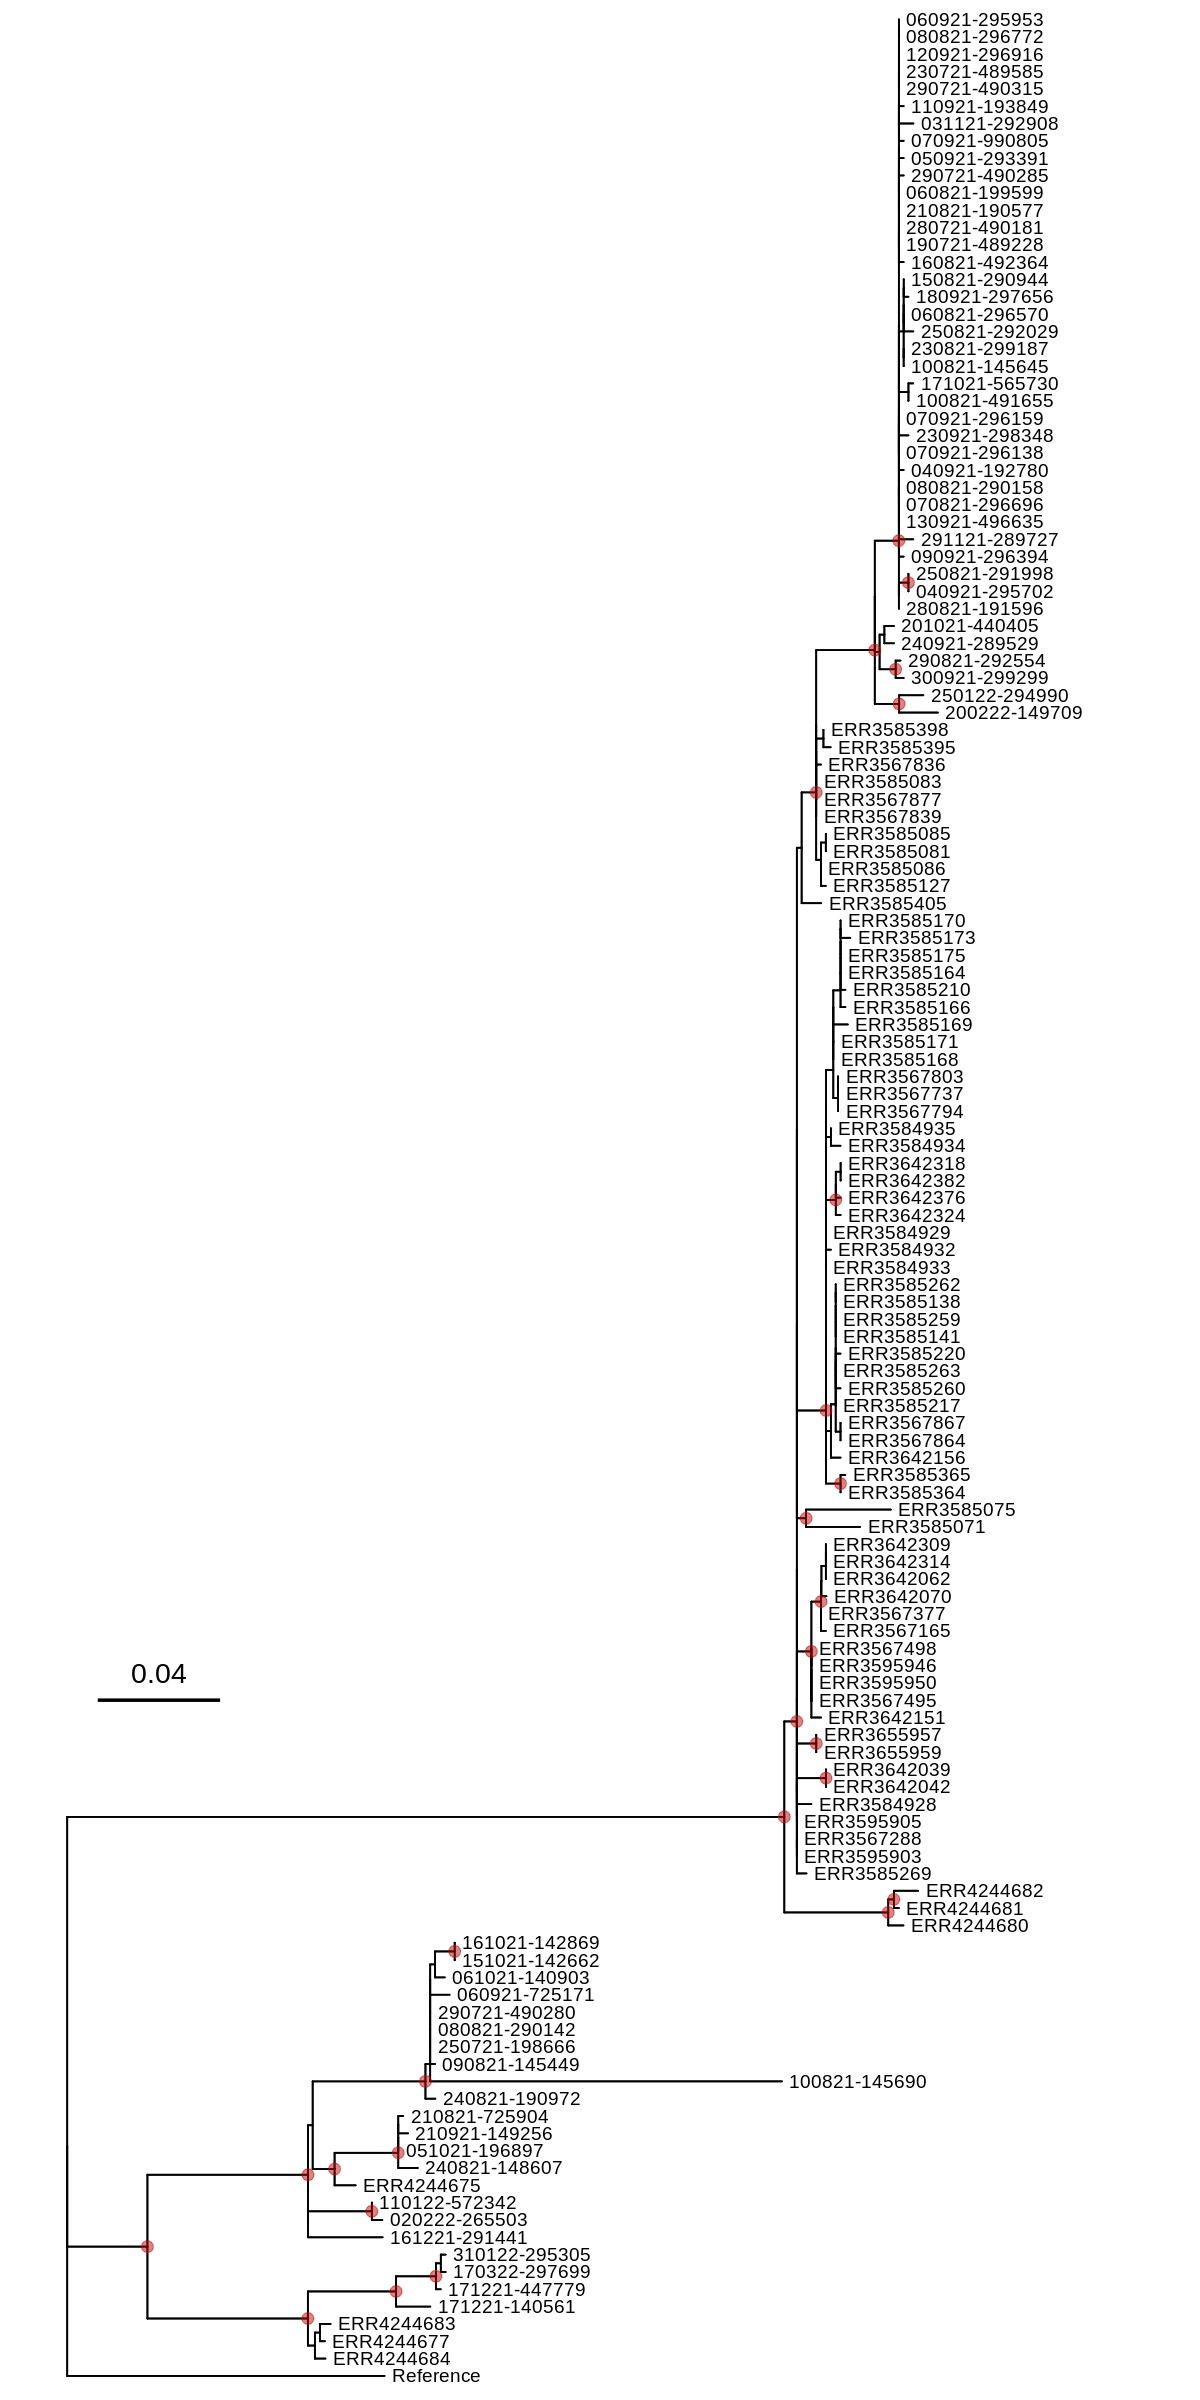

In [5]:
# mytheme <- theme(legend.position="bottom",legend.title=element_text(size=20), 
#                  legend.text=element_text(size=16))

options(repr.plot.width=10, repr.plot.height=20)

p1 <- ggtree(rooted_tree) + geom_tree() + 
        geom_treescale(x=0.01, y=40, width=0.04, color='black', linesize=1.0,
                        fontsize=6, offset=1) +
        geom_nodepoint(aes(subset = !is.na(as.numeric(bootstrap)) & as.numeric(bootstrap) >= 90), 
                                color="#ba0b0b", alpha=1/2, size=3)

p1 + geom_tiplab(offset=0.001, size=4) + mytheme + xlim(0.0, 0.35)

In [6]:
# Extract isolates of this study which are in the dominant clade
m <- subset(as_tibble(rooted_tree), label=="200222-149709")$parent
n <- subset(as_tibble(rooted_tree), node==m)$parent
d <- offspring(as_tibble(rooted_tree), n)
dominants <- dplyr::filter(d, is.na(bootstrap))

# Check (the number of isolates)
print(dim(dominants)[1])

head(dominants)

[1] 41


parent node branch.length label         bootstrap
1 218    72   0.012661862   200222-149709 NA       
2 218    73   0.007898625   250122-294990 NA       
3 221    74   0.002634539   300921-299299 NA       
4 221    75   0.001588794   290821-292554 NA       
5 222    76   0.003162577   240921-289529 NA       
6 222    77   0.003152422   201021-440405 NA

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.001276  1.005179  2.360318  4.902966  9.037837 21.222305 
[1] 5.491275


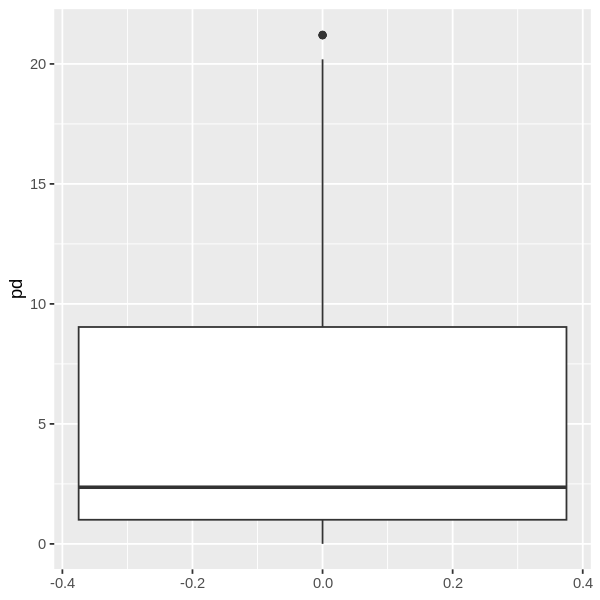

In [7]:
pairwise_all <- ape::cophenetic.phylo(as.phylo(rooted_tree))

# Pairwise distances of this study's isolates in the dominant clade
alignment_len <- 638
pairwise_dominants <- pairwise_all[dominants$label, dominants$label]*alignment_len

pd <- pairwise_dominants[row(pairwise_dominants) != col(pairwise_dominants)]

print(pd %>% summary)
print(pd %>% sd)

options(repr.plot.width=5, repr.plot.height=5)
ggplot() + geom_boxplot(aes(y=pd))

In [8]:
color_table <- read.table("./meta/KpST16_136VNstrains.color.tsv", sep="\t", 
                            header = TRUE, stringsAsFactors = FALSE, comment.char = "")
# myfill <- scale_fill_manual(breaks = c(as.vector(color_table$label), NaN), 
#                             values = c(as.vector(color_table$color), "white"))
myfill <- function(name=""){
    f <- scale_fill_manual(breaks = as.vector(color_table$label),
                            values = as.vector(color_table$color), 
                            na.translate = FALSE, 
                            name = name)
    return(f)
}

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


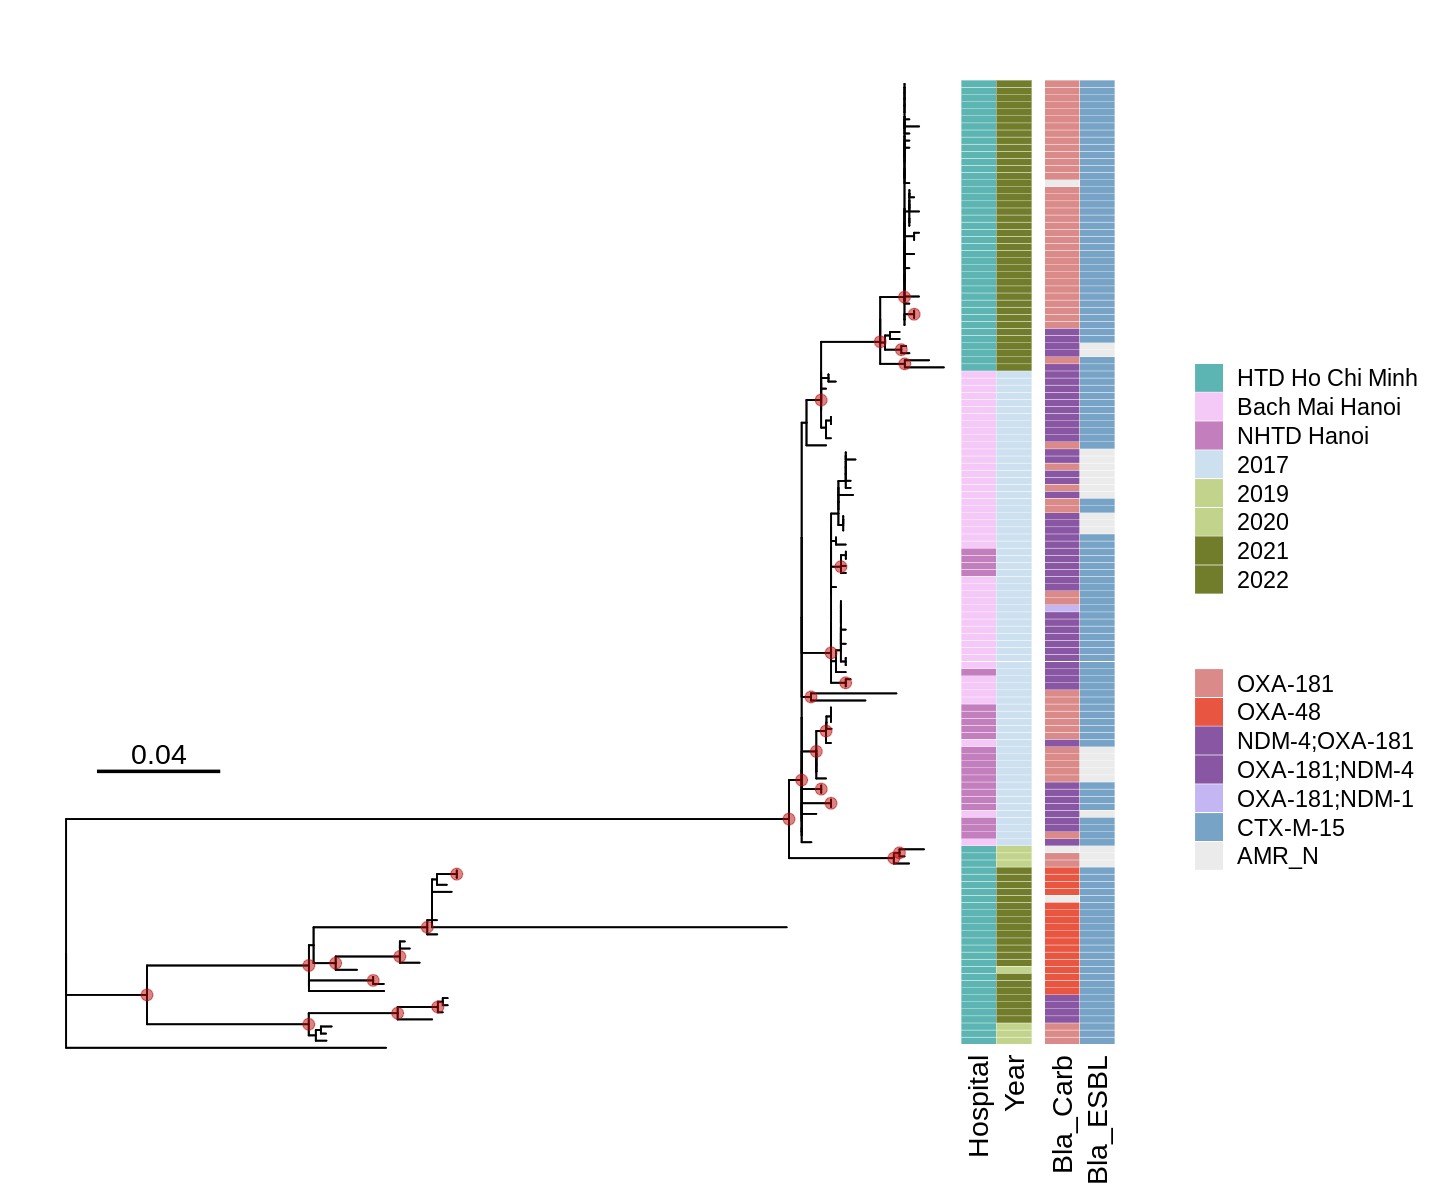

In [9]:
options(repr.plot.width=12, repr.plot.height=10)
# par(mar=par('mar')+c(0,0,0,10))

p2 <- gheatmap(p1, meta[c('Hospital', 'Year')], offset=0.00, width=0.04*2,
                colnames_angle = 90, hjust=1, colnames_offset_y = 0, 
                font.size=6) + myfill()

p2a <- p2 + new_scale_fill()
p3 <- gheatmap(p2a, meta[c('Bla_Carb', 'Bla_ESBL')], offset=0.027, width=0.04*2,
                colnames_angle = 90, hjust=1, colnames_offset_y = 0, 
                font.size=6) + myfill()
p3 + mytheme + ylim(-11, 140)

In [10]:
final_plot <- p3 + mytheme + ylim(-11, 140)
#ggsave("./fig/KpST16_136VNstrains.phylo.pdf", width = 12, height = 10)

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


In [11]:
# p5 <- p4 + new_scale_fill()
# p_gephe <- gheatmap(p5, meta[, c(2:9)], offset=0.076, width=0.1*8,
#                 colnames_angle = 90, hjust=1, colnames_offset_y = 0, 
#                 font.size=5) + 
#             scale_fill_manual(breaks = c("R", "I", "S", "Unknown"),
#                             values = c("#db6565", "#dbcf63", "#b3dbe6", "white"), na.translate = FALSE)

# p_gephe + mytheme + ylim(-35, 75)
# ggsave("./fig/KpST16_69VNstrains.phylo_pheno.pdf", width = 18, height = 23)